In [2]:
import numpy as np
import pandas as pd

import rpy2.rinterface
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
pandas2ri.activate()

In [3]:
%load_ext rpy2.ipython

First we have to load in the R scripts that simulate the more involved data sets.

In [4]:
%%R 
source("sim.R")
r_df <- sim(n=1000, het_linear=TRUE)

Now we have to transform the R DataFrame to a pandas DataFrame.

In [5]:
r_df = ro.r('r_df')
with localconverter(ro.default_converter + pandas2ri.converter):
  df = ro.conversion.rpy2py(r_df)
df.head()

,Y0,Y1,X,D,Y_obs,IntXD,CATE,trueps,pslog,psprob,tauihat,tauhatknn
1,2.515374,7.386507,0.603857,0,2.515374,0.000000,5.207714,0.5,0.513874,0.513869,5.566924,5.428565
2,3.099457,7.583435,0.403601,0,3.099457,0.000000,4.807203,0.5,0.500396,0.500392,3.480315,4.350182
3,2.443007,6.055361,0.353460,0,2.443007,0.000000,4.706921,0.5,0.497021,0.497017,4.395460,4.619322
4,1.264889,8.295328,0.441032,1,8.295328,0.441032,4.882063,0.5,0.502916,0.502912,5.693582,3.978782
5,2.344266,7.030995,0.542491,0,2.344266,0.000000,5.084982,0.5,0.509745,0.509740,5.093719,4.664540


At last we will construct pandas DataFrames and Series for y, X and D

In [6]:
y = (df['D'] * df['Y1'] + (1 - df['D']) * df['Y0'])
X = (df['X'])
D = (df['D'])

In [7]:
import CausalTree as ct
from CausalTree import *

In [8]:
ctree_sparse, ctree_opt = ct.CausalTree.apply_kFold_CV(X, y, D)

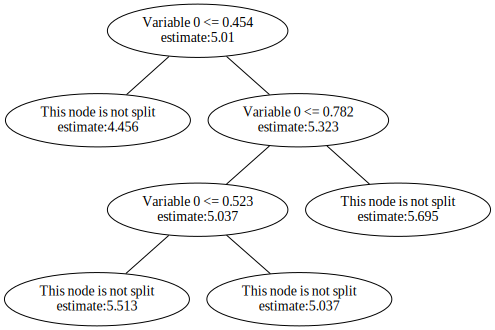

In [11]:
ctree_sparse.plot()

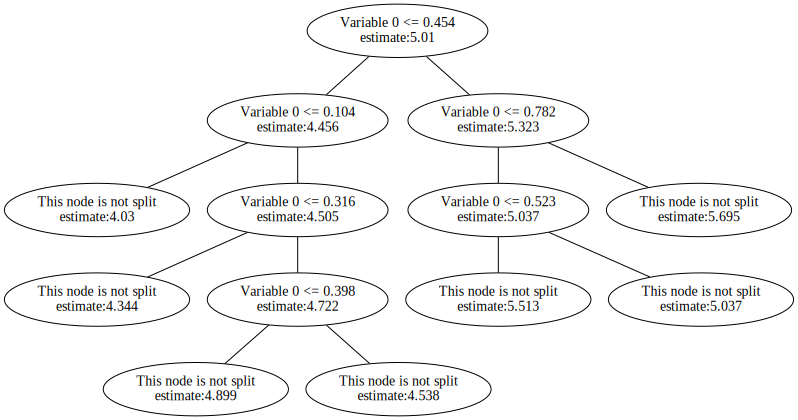

In [12]:
ctree_opt.plot()

In [22]:
ctree_sparse

Causal Tree; fitted = True; id = 139628318972336

In [31]:
tau_hat = ctree_sparse.predict(X)
tau_real = df['CATE']